In [44]:
from copy import deepcopy

In [1]:
from pam.core import Population, Household, Person
from pam.activity import Plan, Activity, Leg
from pam.utils import minutes_to_datetime as mtdt
from pam.variables import END_OF_DAY

In [28]:
personA = Person('A', attributes={'age': 20})
personA.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(420)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(420), end_time=mtdt(480), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(480), end_time=mtdt(510)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(510), end_time=mtdt(540), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(540), end_time=mtdt(1020)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(1020), end_time=mtdt(1140), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1140), end_time=END_OF_DAY)
]

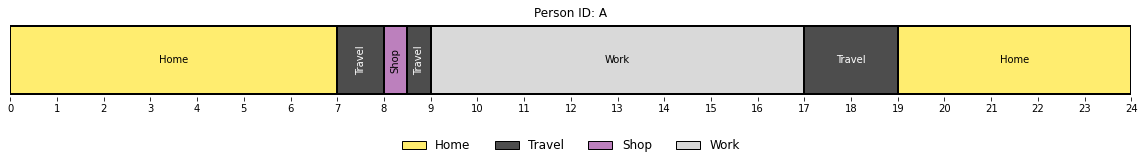

In [29]:
personA.plot()

In [77]:
personB = Person('b', attributes={'age': 20})
personB.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(240)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(240), end_time=mtdt(300), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(300), end_time=mtdt(360)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(360), end_time=mtdt(420), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(420), end_time=mtdt(1200)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(1200), end_time=mtdt(1260), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1260), end_time=END_OF_DAY)
]

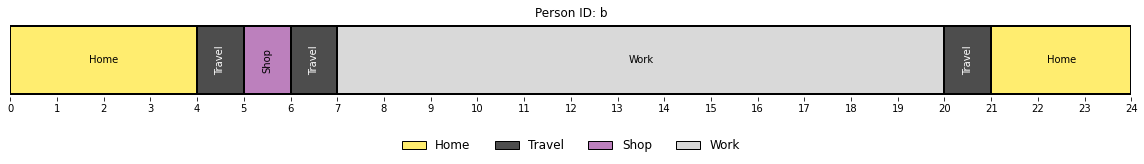

In [78]:
personB.plot()

In [79]:
from pam.scoring import CharyparNagelPlanScorer

In [80]:
config = {
    'mUM': 10,
    'utilityOfLineSwitch': -1,
    'performing': 6,
    'waiting': 0,
    'lateArrival': -18,
    'earlyDeparture': -10,
    'work': {
        'typicalDuration': '08:00:00',
        'openingTime': '06:00:00',
        'closingTime': '20:00:00',
        'latestStartTime': '09:30:00',
        'earliestEndTime': '16:00:00'
        },
    'home': {
        'typicalDuration': '12:00:00'
        },
    'shop': {
        'typicalDuration': '00:30:00',
        'openingTime': '06:00:00',
        'closingTime': '20:00:00'
        },
    'car': {
        'constant': -10,
        'dailyMonetaryConstant': -0,
        'dailyUtilityConstant': -0,
        'marginalUtilityOfDistance': -0,
        'marginalUtilityOfTravelling': -0,
        'monetaryDistanceRate': -0.0001
        },
    'walk': {
        'constant': -5,
        'marginalUtilityOfTravelling': -1,
        }
    }

In [81]:
scorer = CharyparNagelPlanScorer()

In [82]:
print(scorer.score(personA.plan, cnfg=config))
print(scorer.score(personB.plan, cnfg=config))

103.76307495249462
76.29362417991327


In [83]:
from pam.policy import *

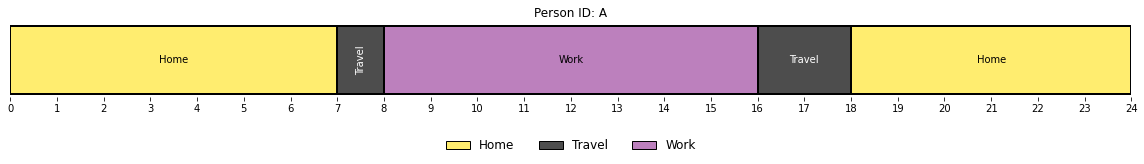

In [84]:
modifier = RemoveActivity(["shop"])
modifier.apply_to(household=None, person=personA)
personA.plot()

In [85]:
scorer.score(personA, cnfg=config)

103.76307495249462

In [89]:
from matplotlib import pyplot as plt
from pam.optimise.random import reschedule

In [100]:
plan, log = reschedule(
    deepcopy(personB.plan),
    plans_scorer=scorer,
    config=config,
    patience=10000
    )

Initial best score at iteration 0: 76.29362417991327
New best score at iteration 34: 76.33735867134074
New best score at iteration 51: 90.20598346614346
New best score at iteration 235: 93.5186862207142
New best score at iteration 279: 94.36946401813874
New best score at iteration 802: 95.08486065948456
New best score at iteration 1463: 95.98903930339115
New best score at iteration 6059: 96.14664379390673


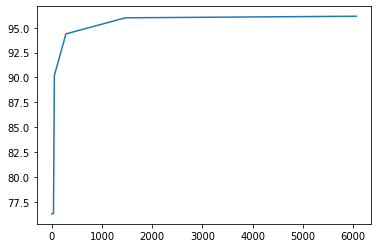

In [101]:
plt.plot(list(log.keys()), list(log.values()))